In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [8]:
# Pip install method (recommended)

!pip install -U ultralytics supervision roboflow




from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dHveoW3xmLy8YlRhLx14")
project = rf.workspace("cutm-jipbe").project("gender-detection-irbyv")
version = project.version(1)
dataset = version.download("yolov11")
                
                
                


/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gender-Detection-1 in yolov11:: 100%|██████████| 4298/4298 [00:00<00:00, 7591.68it/s]


## Custom Training

In [9]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 70.4MB/s]
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 49.3MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 101.4ms
Speed: 35.7ms preprocess, 101.4ms inference, 664.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True

/kaggle/working
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/datasets/Gender-Detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

/kaggle/working


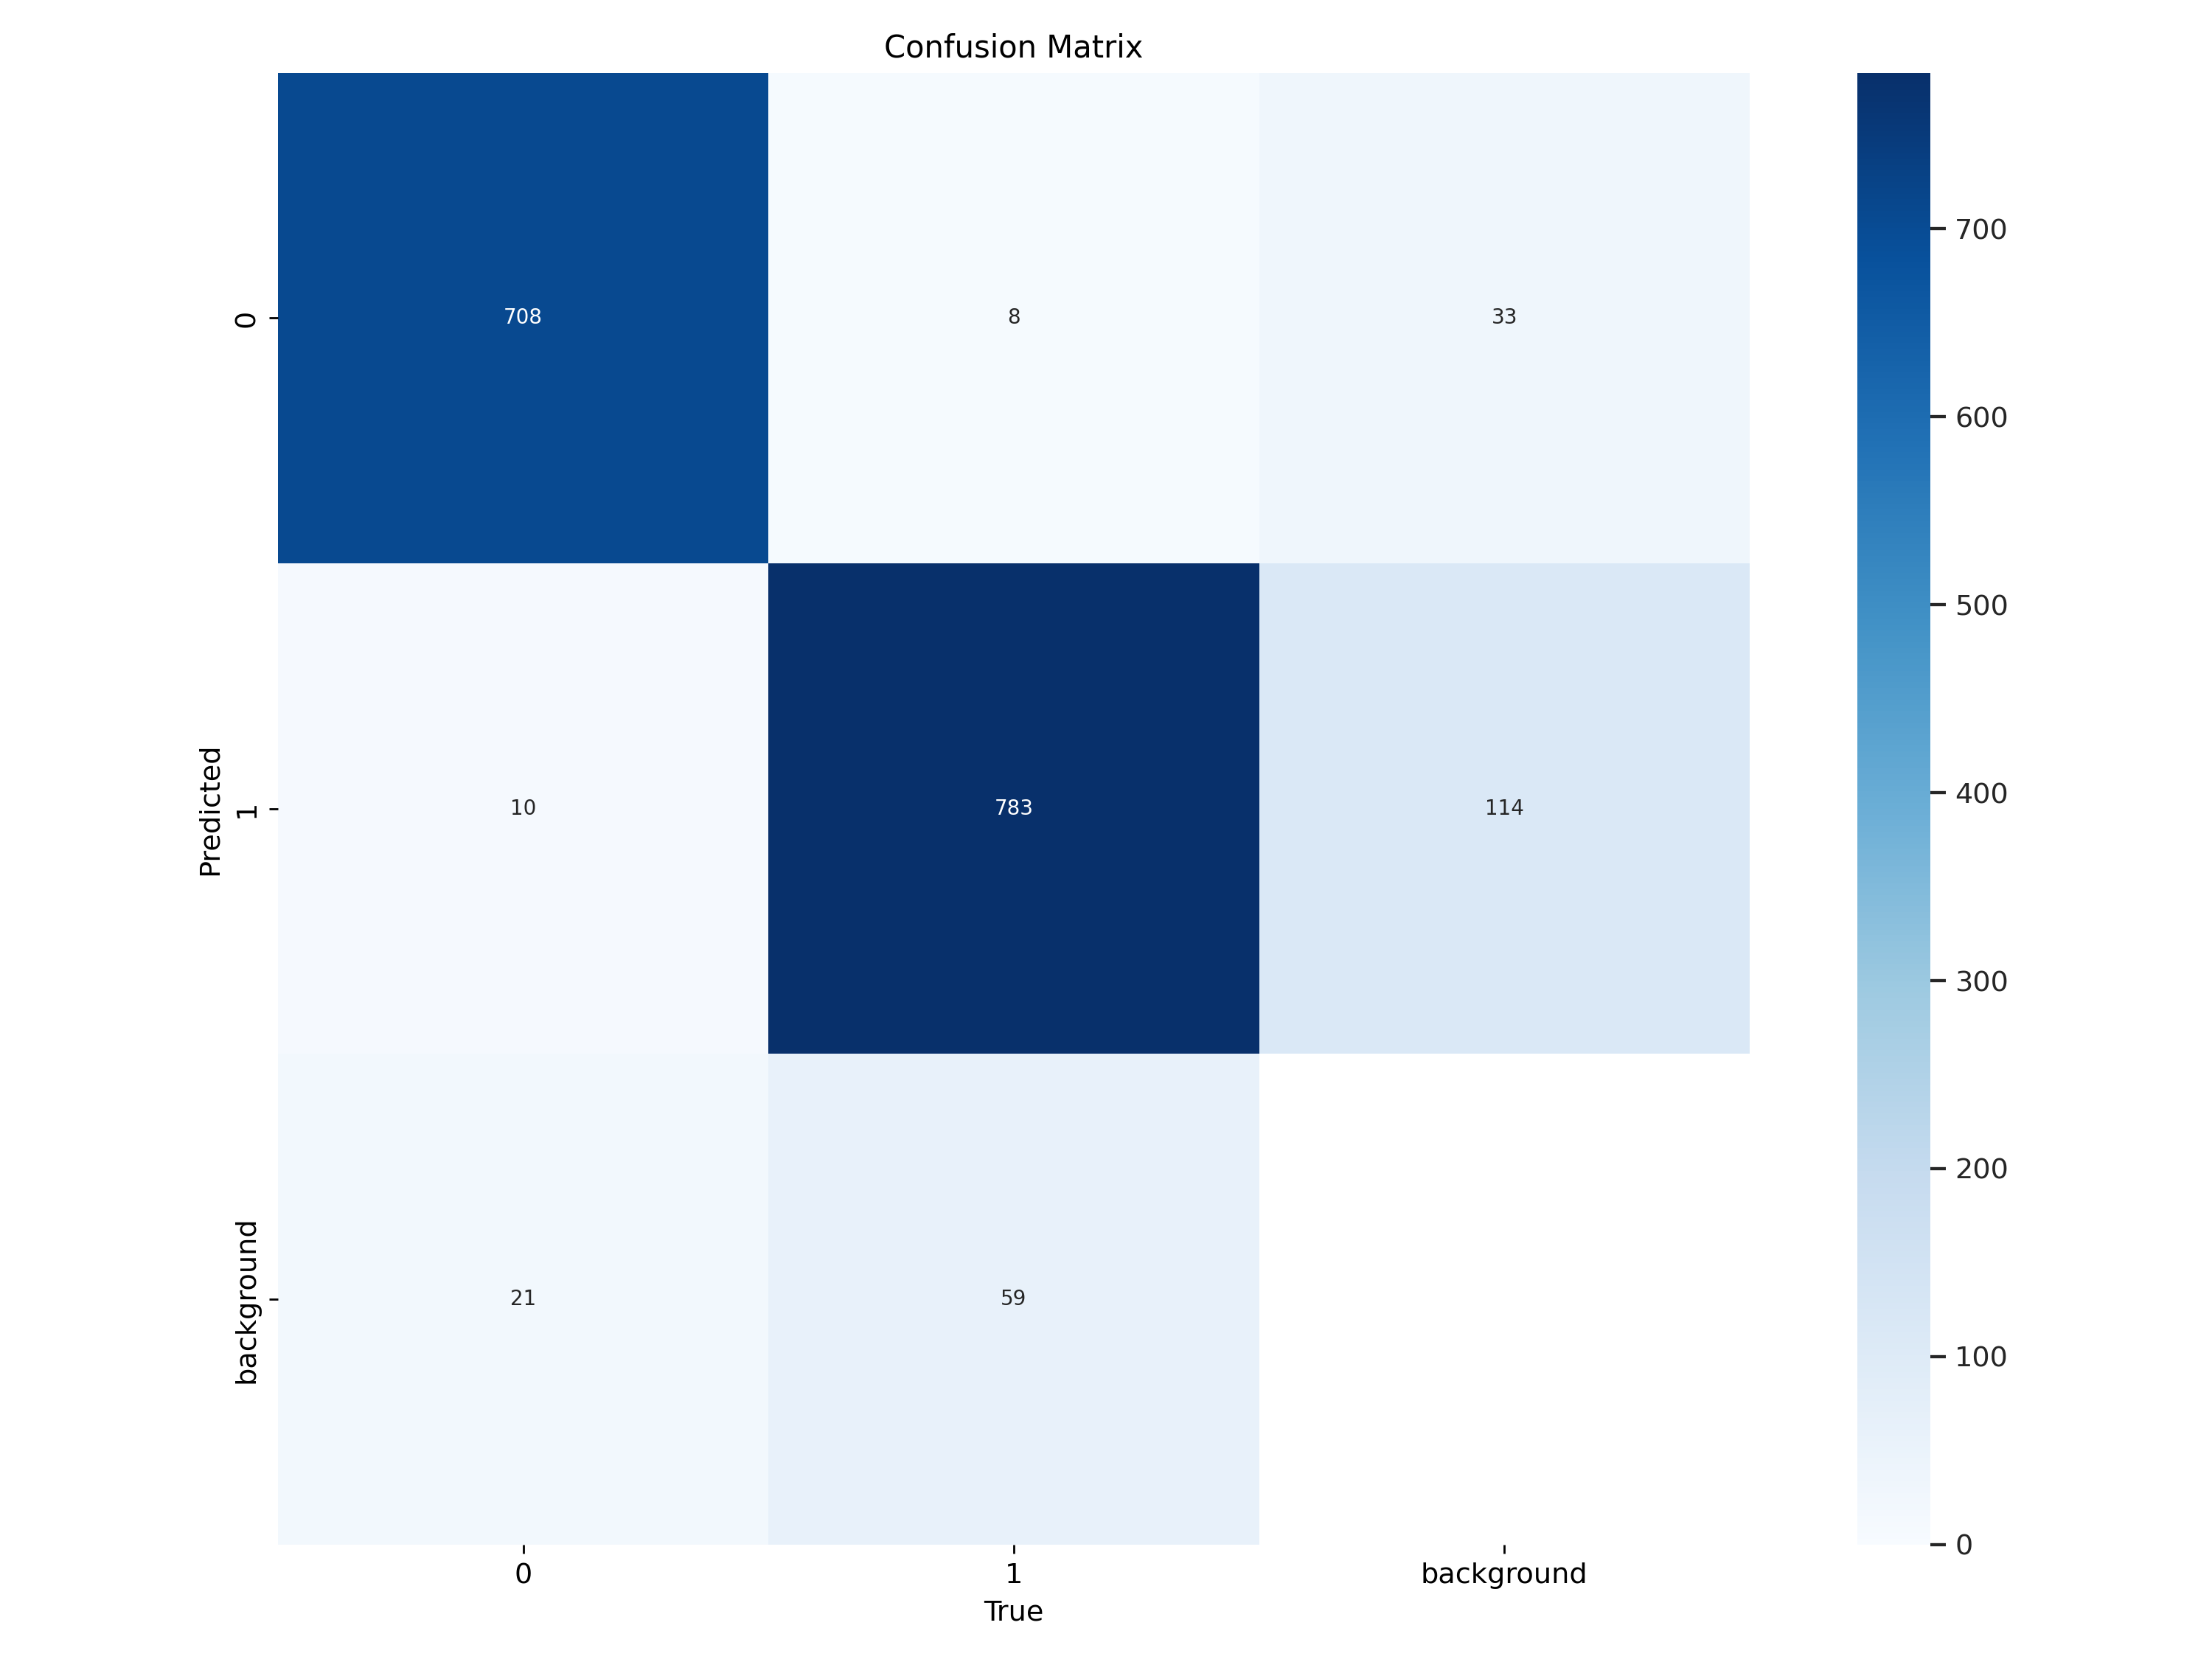

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


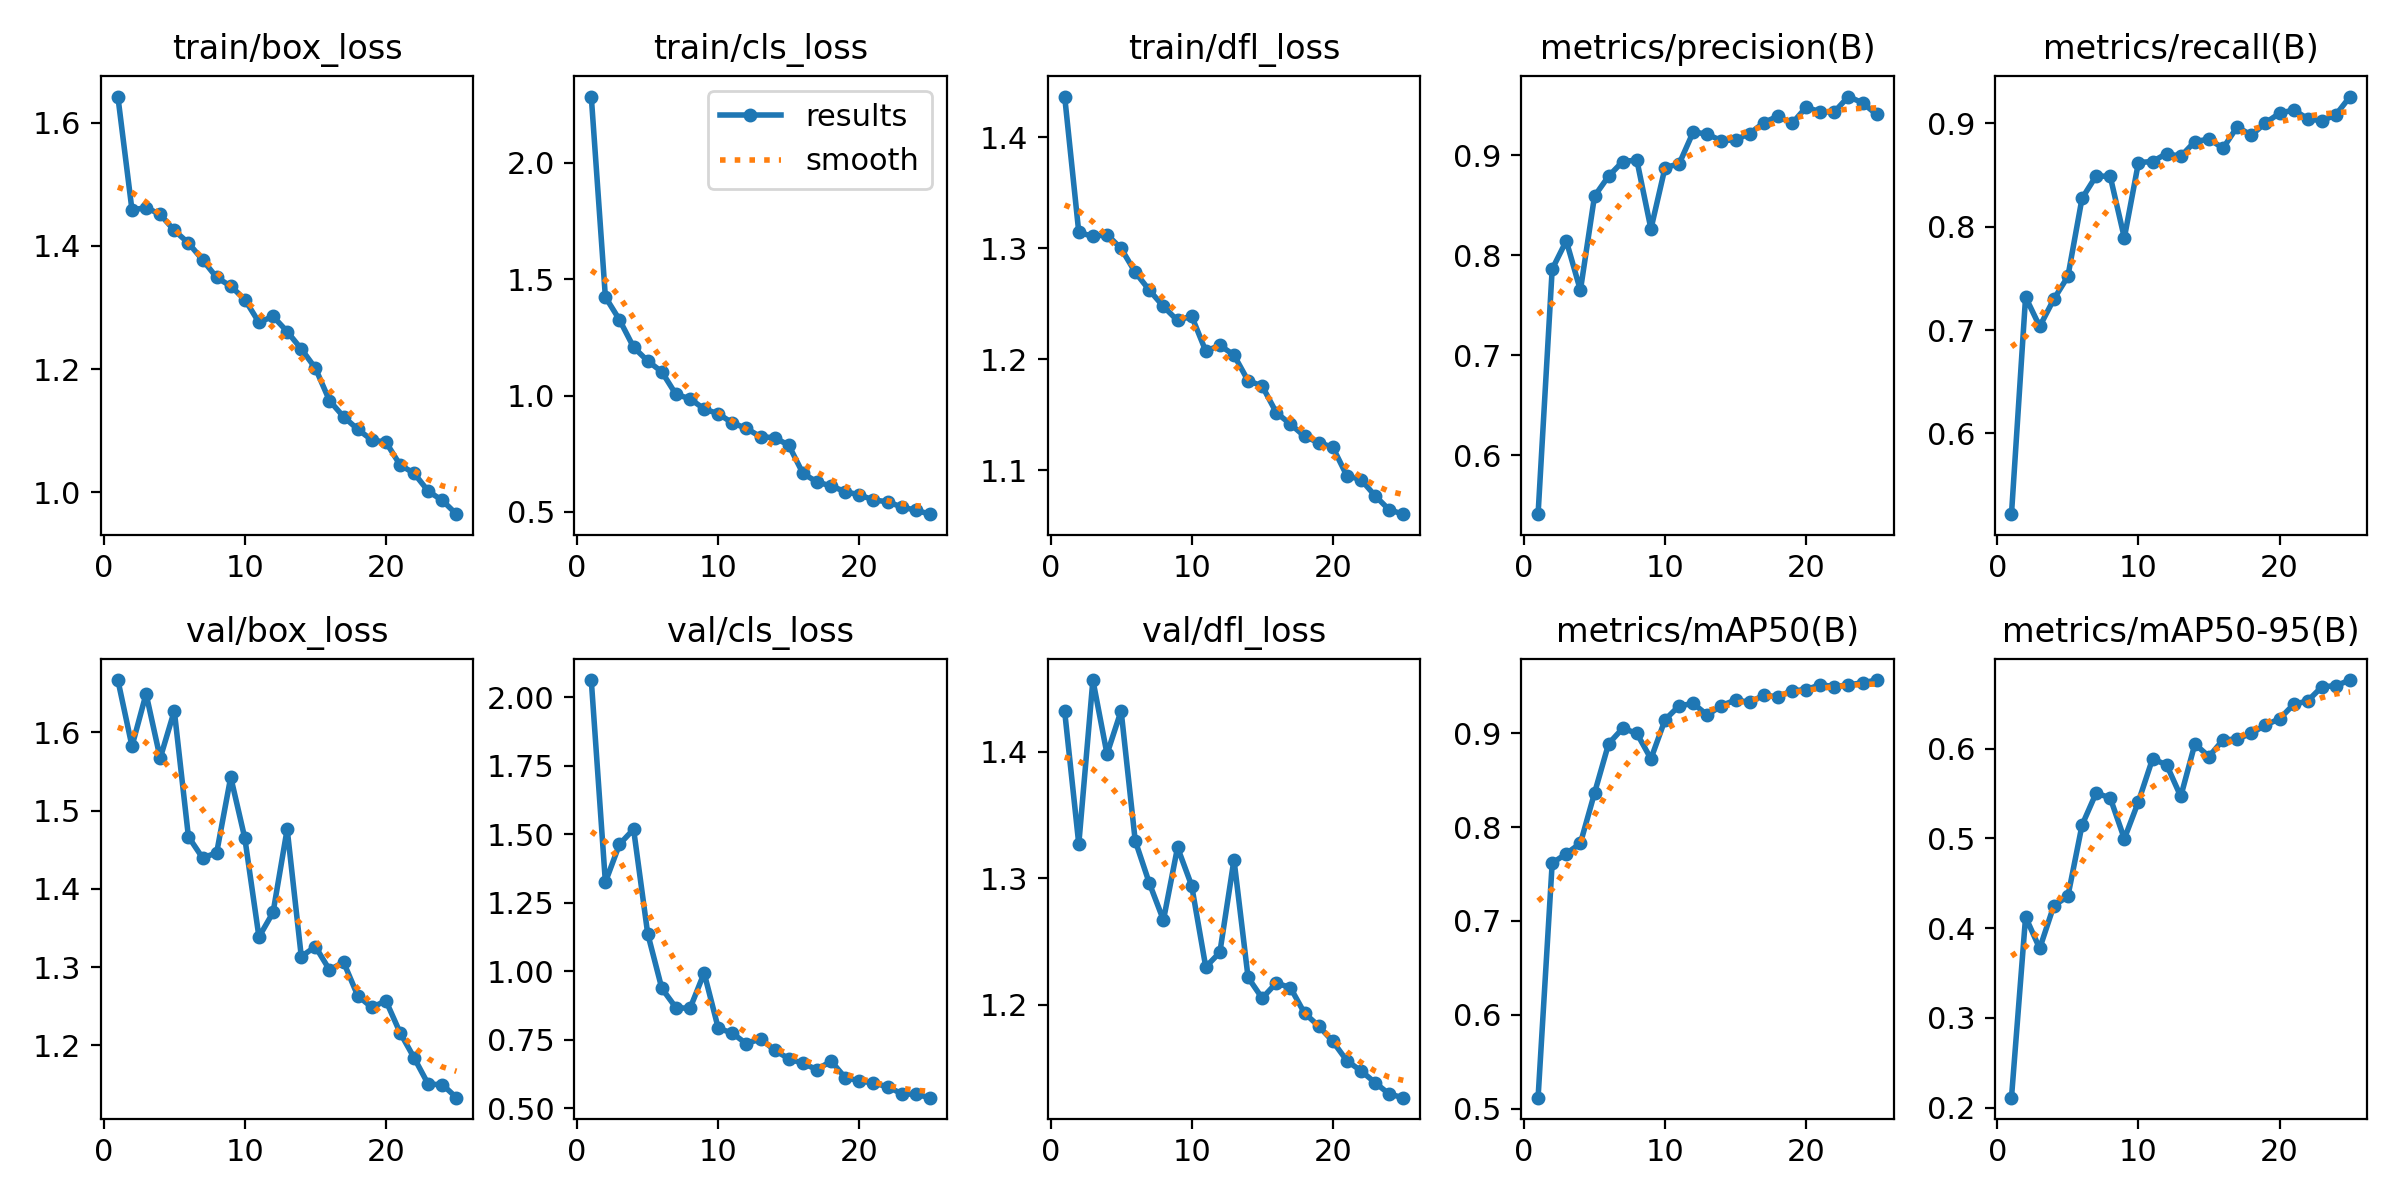

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


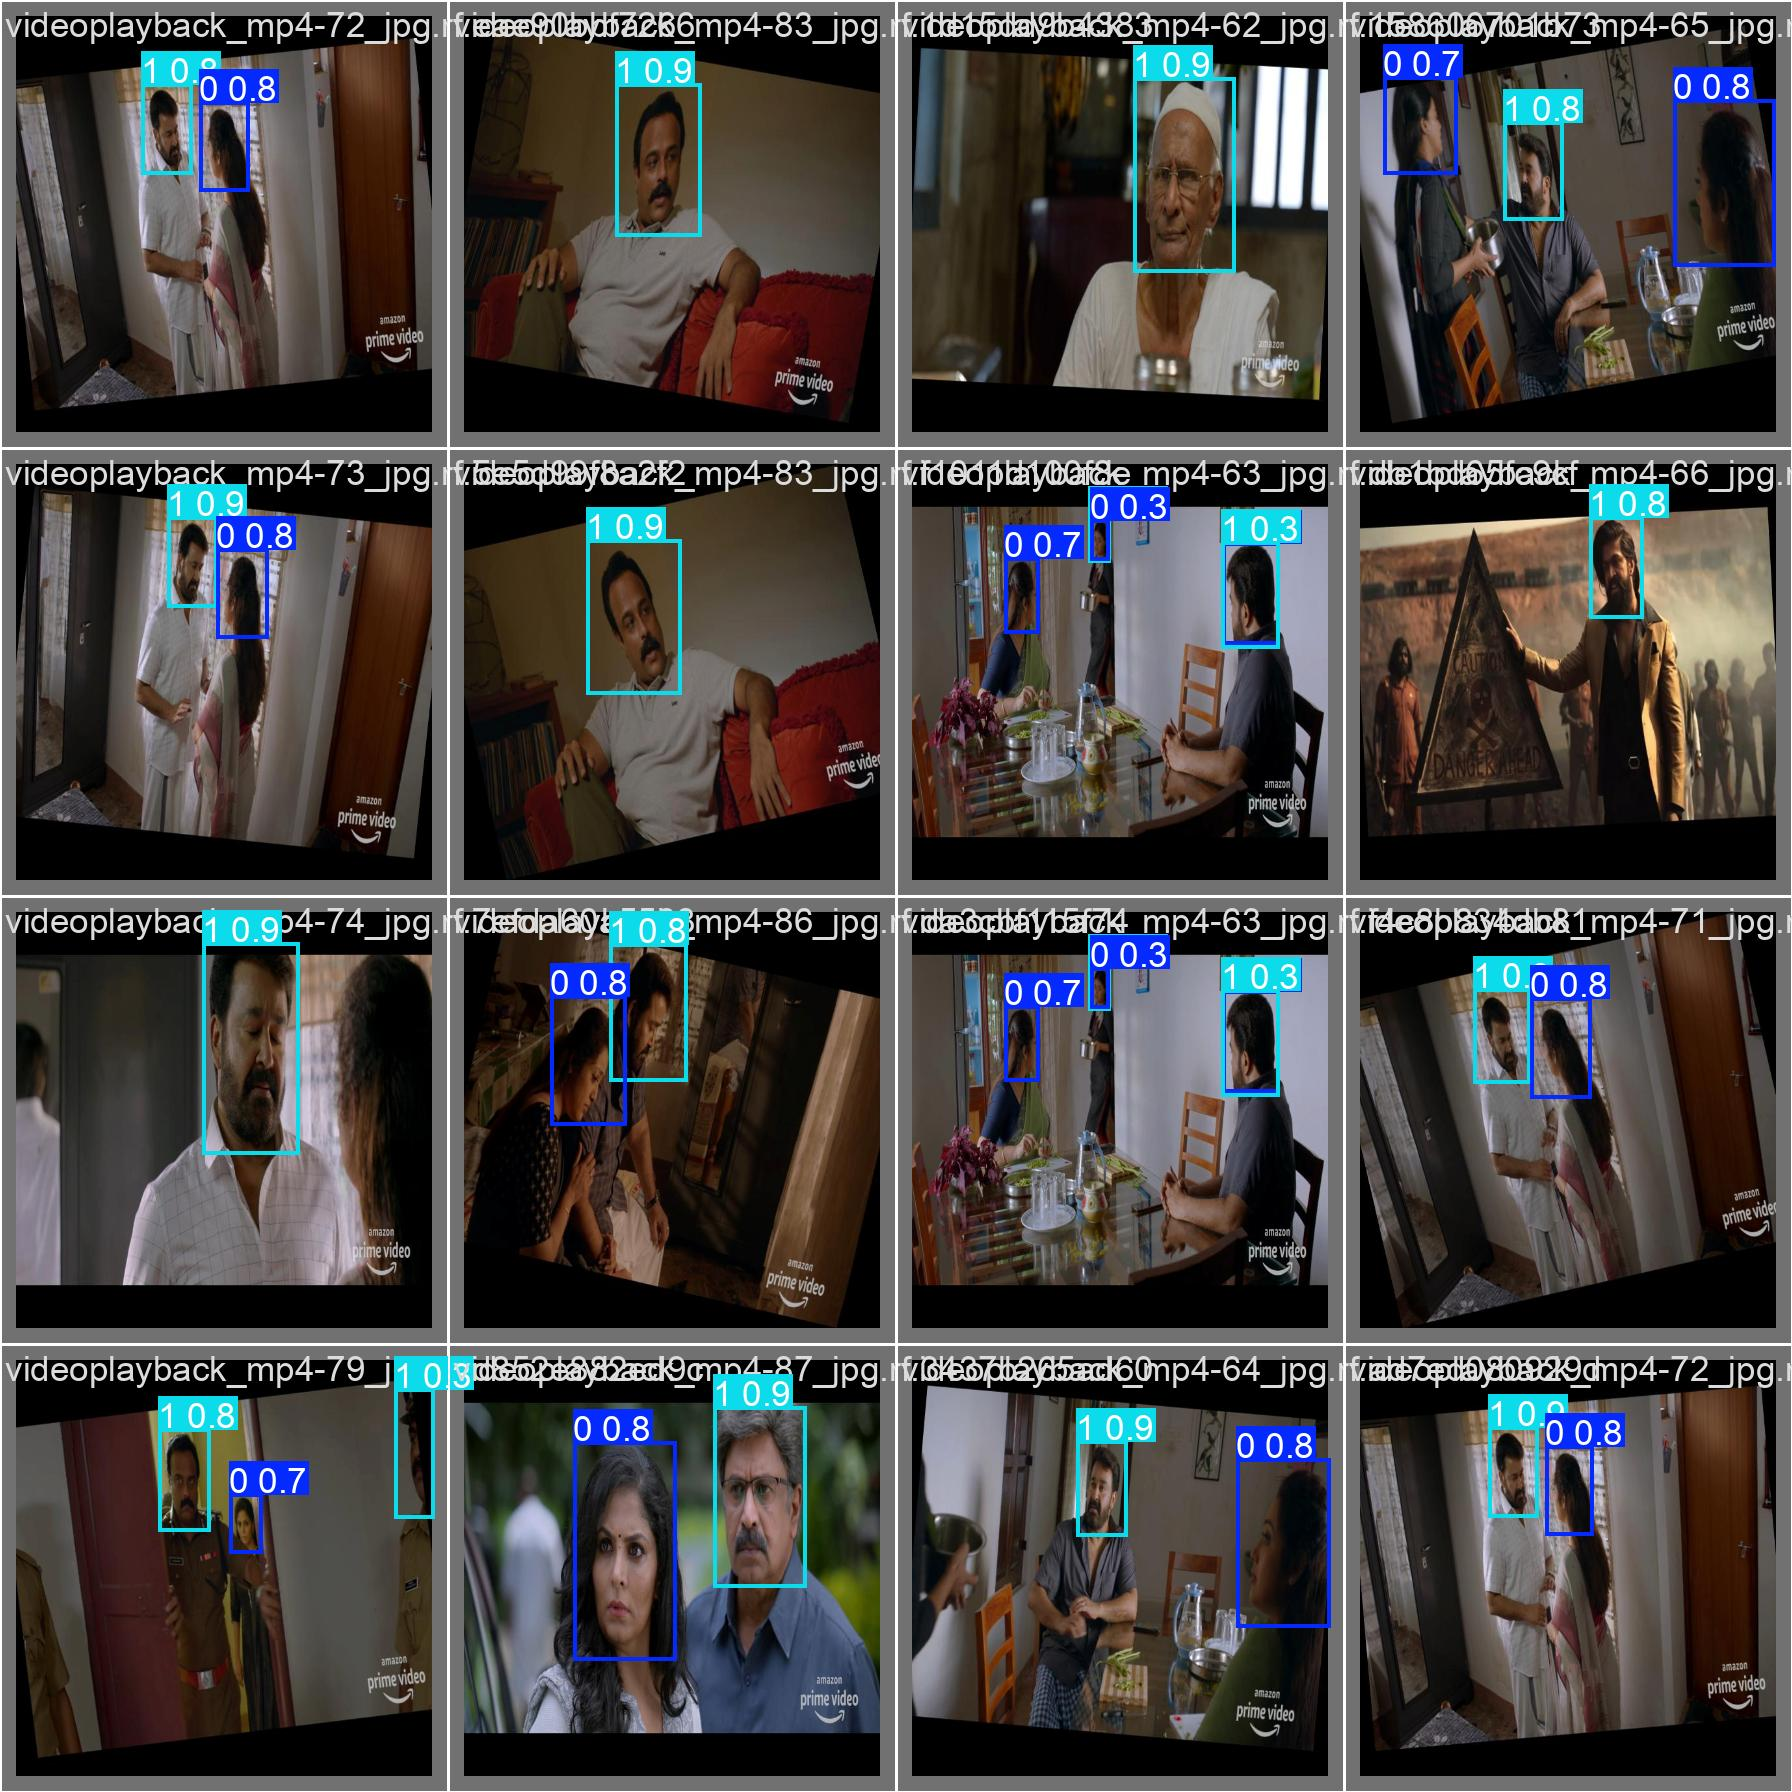

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/datasets/Gender-Detection-1/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        553       1589      0.946      0.918      0.958      0.677
                     0        396        739      0.963      0.949      0.973      0.686
                     1        463        850       0.93      0.887      0.942      0.667
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn

## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.70 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/200 /kaggle/working/datasets/Gender-Detection-1/test/images/152_jpg.rf.971b8b32104eedc5e854c58c3bb76def.jpg: 416x416 1 0, 1 1, 10.0ms
image 2/200 /kaggle/working/datasets/Gender-Detection-1/test/images/182_jpg.rf.eb41622ff35e05198839a2c9d8ddf57a.jpg: 416x416 1 0, 1 1, 9.5ms
image 3/200 /kaggle/working/datasets/Gender-Detection-1/test/images/Florida-Man-_-Official-Trailer-_-Netflix_mp4-2_jpg.rf.e71c23d2bd7a60a7c360ef10cd2e006a.jpg: 416x416 1 1, 8.8ms
image 4/200 /kaggle/working/datasets/Gender-Detection-1/test/images/Img1001_jpg.rf.272b67c80927f4e7f2b319150fb0a56f.jpg: 416x416 3 0s, 8.4ms
image 5/200 /kaggle/working/datasets/Gender-Detection-1/test/images/Img1017_jpg.rf.739c40cef2ee6eced0507b875f6d9f5b.jpg: 416x416 1 0, 8.6ms
image 6/200 /kaggle/working/datasets/Gender-Detection-1/test/images/Img1077

**NOTE:** Let's take a look at few results.

In [17]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/'